In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("SupermartSales.csv")

In [4]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [5]:
df.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [8]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.sample()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
40,OD41,Malik,Beverages,Health Drinks,Namakkal,12/27/2016,Central,660,0.19,92.4,Tamil Nadu


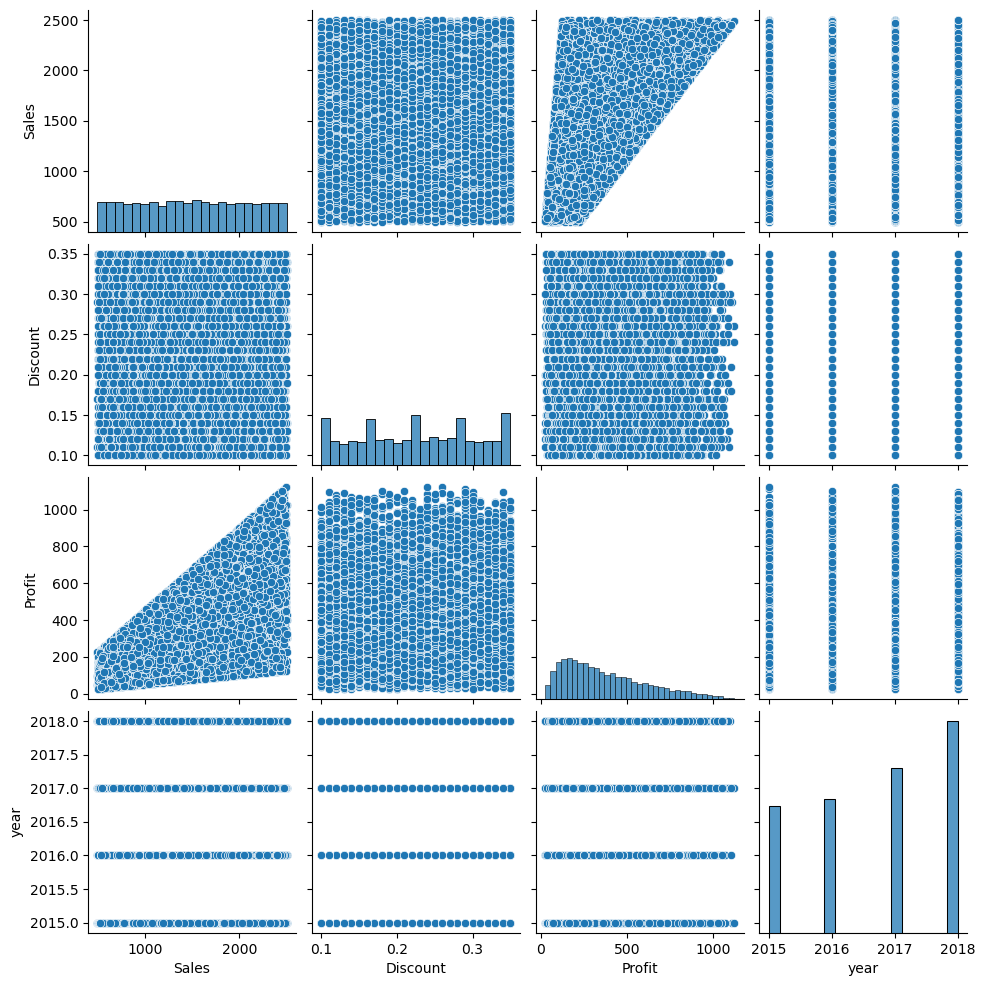

In [82]:
sbn.pairplot(df)

In [13]:
category=df["Category"].value_counts()
category

Snacks               1514
Eggs, Meat & Fish    1490
Fruits & Veggies     1418
Bakery               1413
Beverages            1400
Food Grains          1398
Oil & Masala         1361
Name: Category, dtype: int64

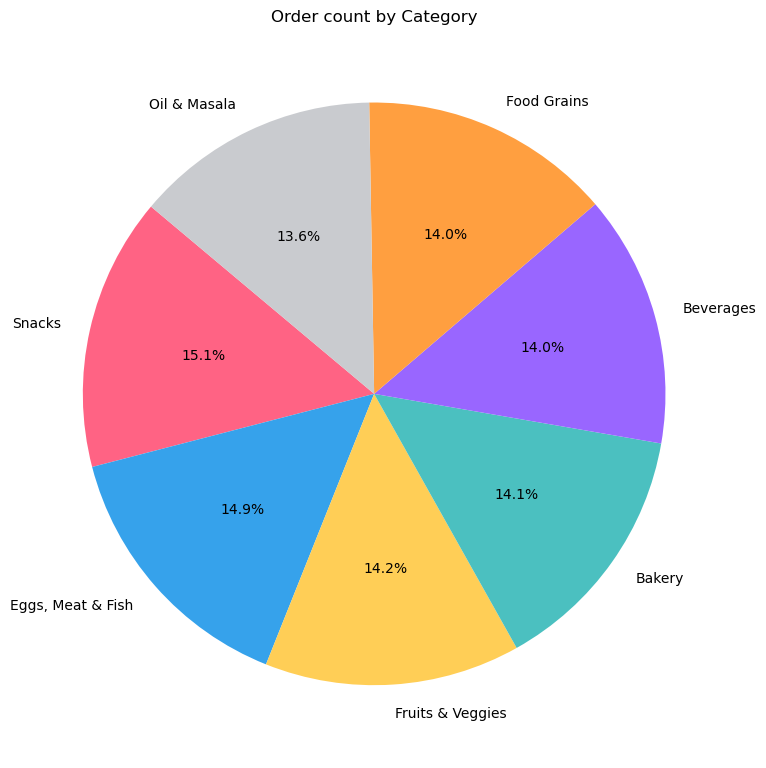

In [14]:
plt.figure(figsize=(8,8))
colors = [
    "#FF6384",  
    "#36A2EB",  
    "#FFCE56",  
    "#4BC0C0",  
    "#9966FF",  
    "#FF9F40",  
    "#C9CBCF",  
]
plt.pie(category , labels=category.index , autopct="%1.1f%%" , startangle=140,colors=colors)
plt.title("Order count by Category")
plt.tight_layout()
plt.show()

In [15]:
category_sales=df.groupby("Category")["Sales"].sum().sort_values(ascending=False)


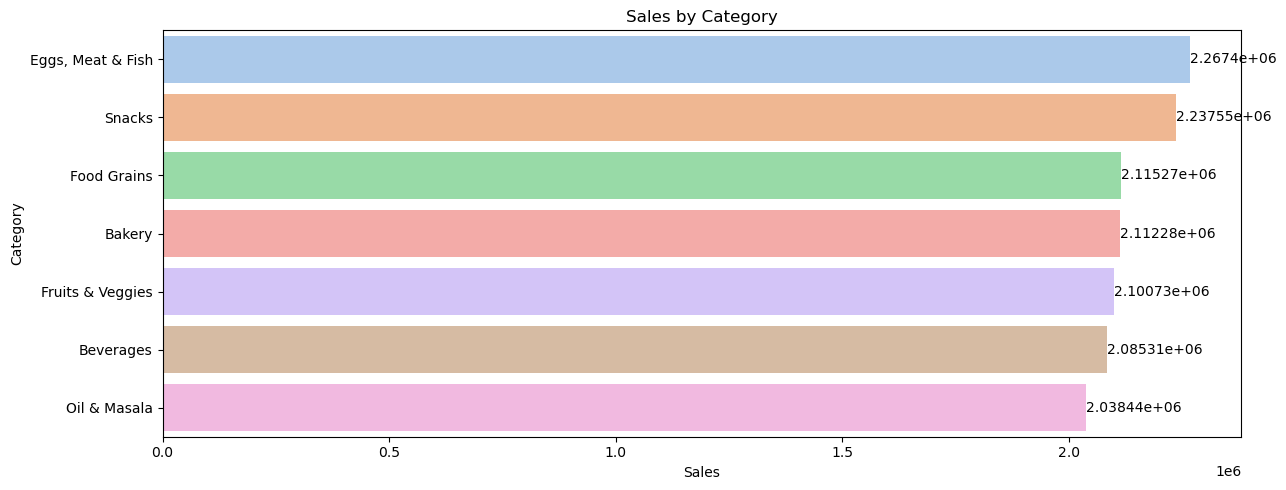

In [19]:
products_sales=df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(13,5))
ax =sbn.barplot(x=products_sales.values , y=products_sales.index , data=df ,palette="pastel" )
plt.title("Sales by Category")
plt.xlabel("Sales")
plt.ylabel("Category")
for container in ax.containers:
    ax.bar_label(container)
    
plt.tight_layout()
plt.show()

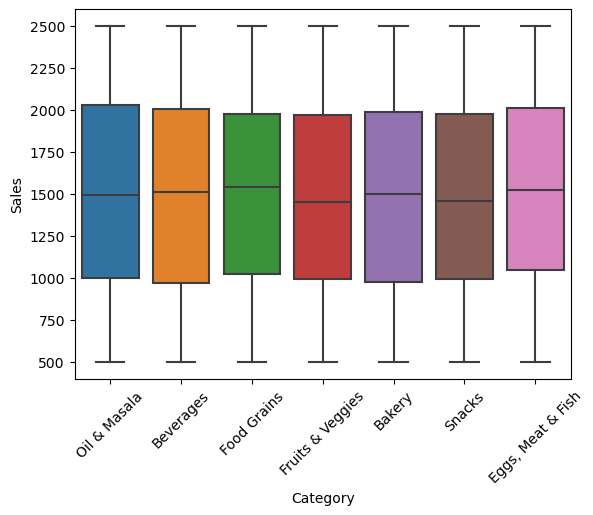

In [81]:
sbn.boxplot(x = "Category", y = "Sales", data =df)
plt.xticks(rotation=45)
plt.show()

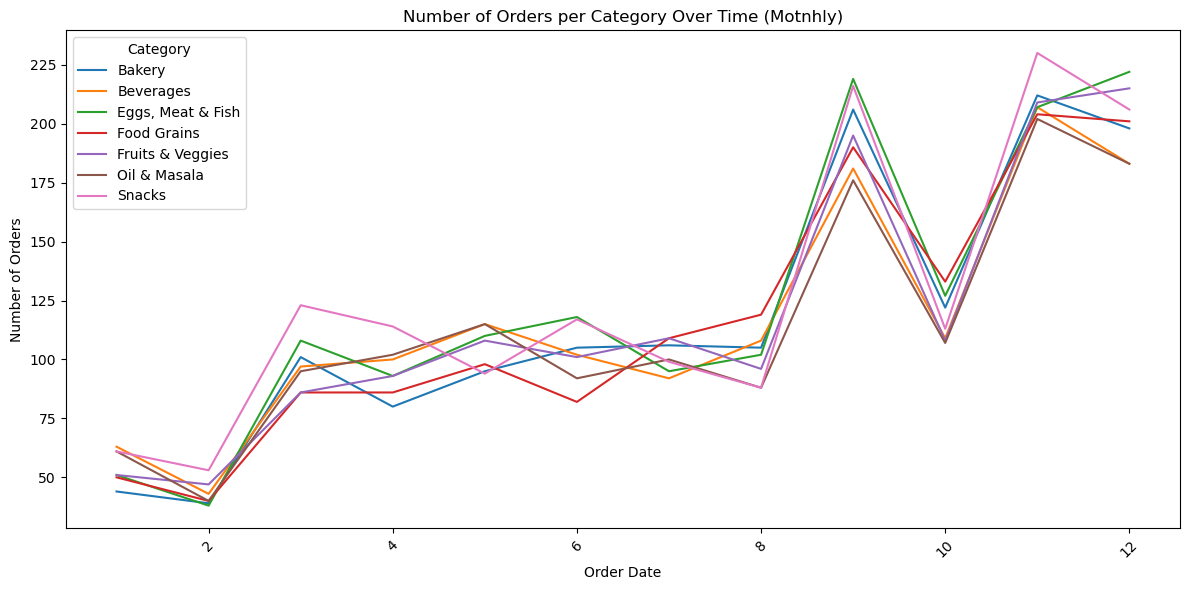

In [50]:
orders_per_category_yearly = df.groupby([df['Order Date'].dt.month, 'Category']).size().reset_index(name='Count')


plt.figure(figsize=(12, 6))
sbn.lineplot(x='Order Date', y='Count', hue='Category', data=orders_per_category_yearly)
plt.title('Number of Orders per Category Over Time (Motnhly)')
plt.xticks(rotation=45)
plt.ylabel('Number of Orders')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

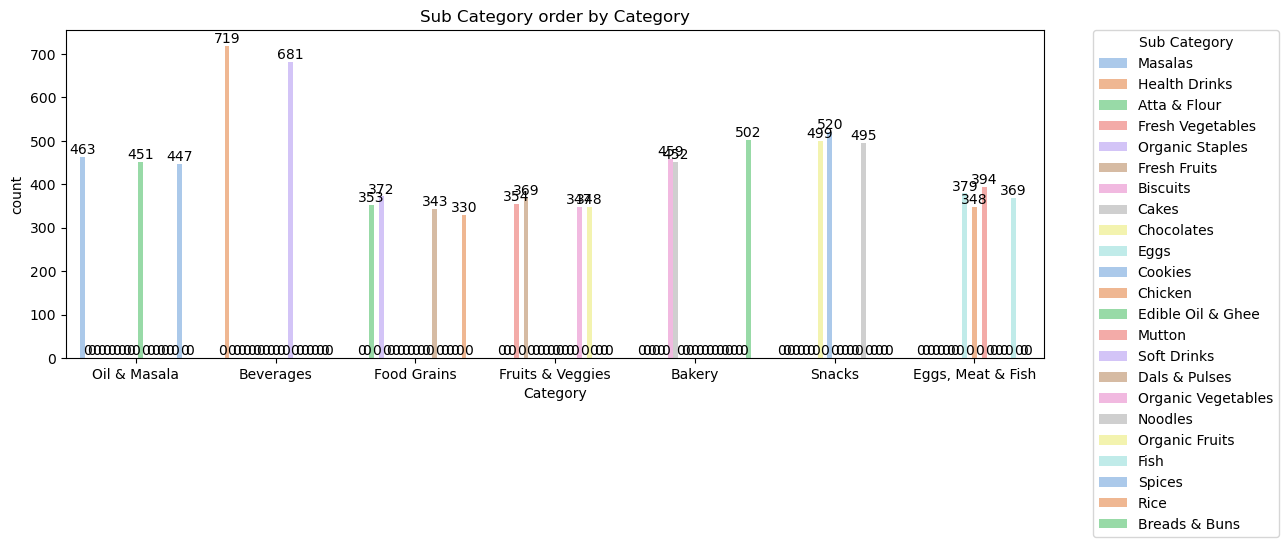

In [23]:
plt.figure(figsize=(13,5))
ax =sbn.countplot(x="Category" , hue="Sub Category" , data=df ,palette="pastel" )
plt.title("Sub Category order by Category")
for container in ax.containers:
    ax.bar_label(container)

ax.legend(title="Sub Category", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

In [24]:
df.sample()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
181,OD182,Ravi,Beverages,Health Drinks,Namakkal,12-05-2015,Central,1718,0.2,171.8,Tamil Nadu


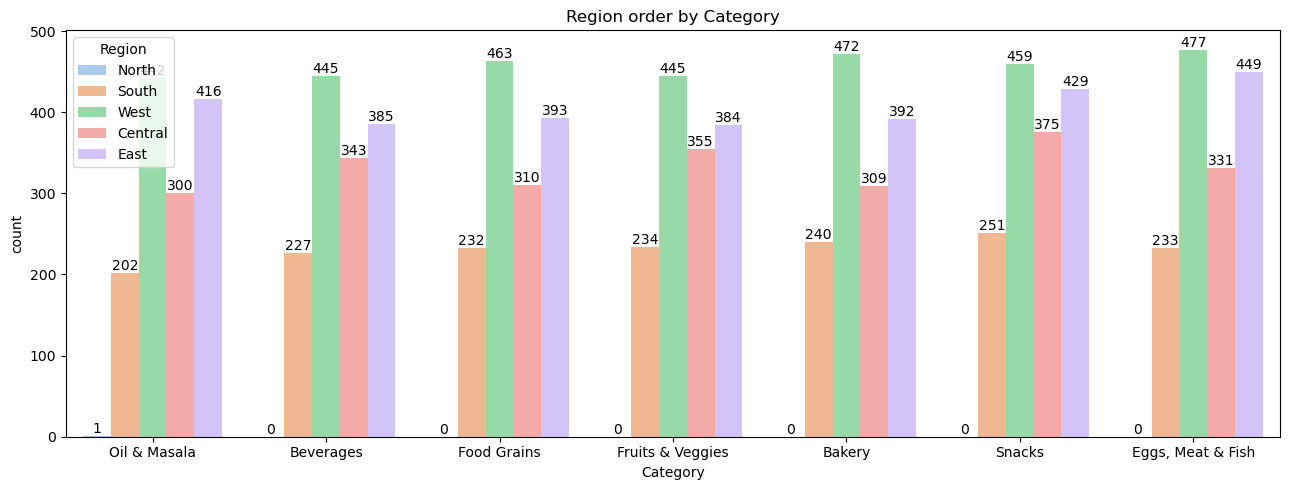

In [25]:
plt.figure(figsize=(13,5))
ax =sbn.countplot(x="Category" , hue="Region" , data=df ,palette="pastel" )
plt.title("Region order by Category")
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

In [99]:
df.pivot_table(index="Region", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Region,,,,,,,
Central,448343.0,501194.0,516642.0,463683.0,526507.0,453293.0,558494.0
East,588241.0,577206.0,677830.0,598868.0,564237.0,622071.0,619915.0
North,NaN,NaN,NaN,NaN,NaN,1254.0,NaN
South,361385.0,344666.0,360963.0,353069.0,352162.0,298859.0,369357.0
West,714312.0,662247.0,711966.0,699652.0,657821.0,662965.0,689780.0


In [100]:
df.pivot_table(index="Region", columns="Category", values="Profit", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Region,,,,,,,
Central,109543.91,128017.14,126587.35,111517.05,131699.53,109261.91,140179.95
East,153741.06,144498.17,164465.08,154932.01,141292.78,155569.22,159847.26
North,NaN,NaN,NaN,NaN,NaN,401.28,NaN
South,89102.07,84058.78,93728.18,94823.55,92961.26,73909.18,94979.87
West,176134.02,169031.67,182576.61,167890.03,164446.81,158753.70,173171.77


In [83]:
df.groupby(["Region"])["Profit"].sum().sort_values(ascending=False).reset_index()

,Region,Profit
0,West,1192004.61
1,East,1074345.58
2,Central,856806.84
3,South,623562.89
4,North,401.28


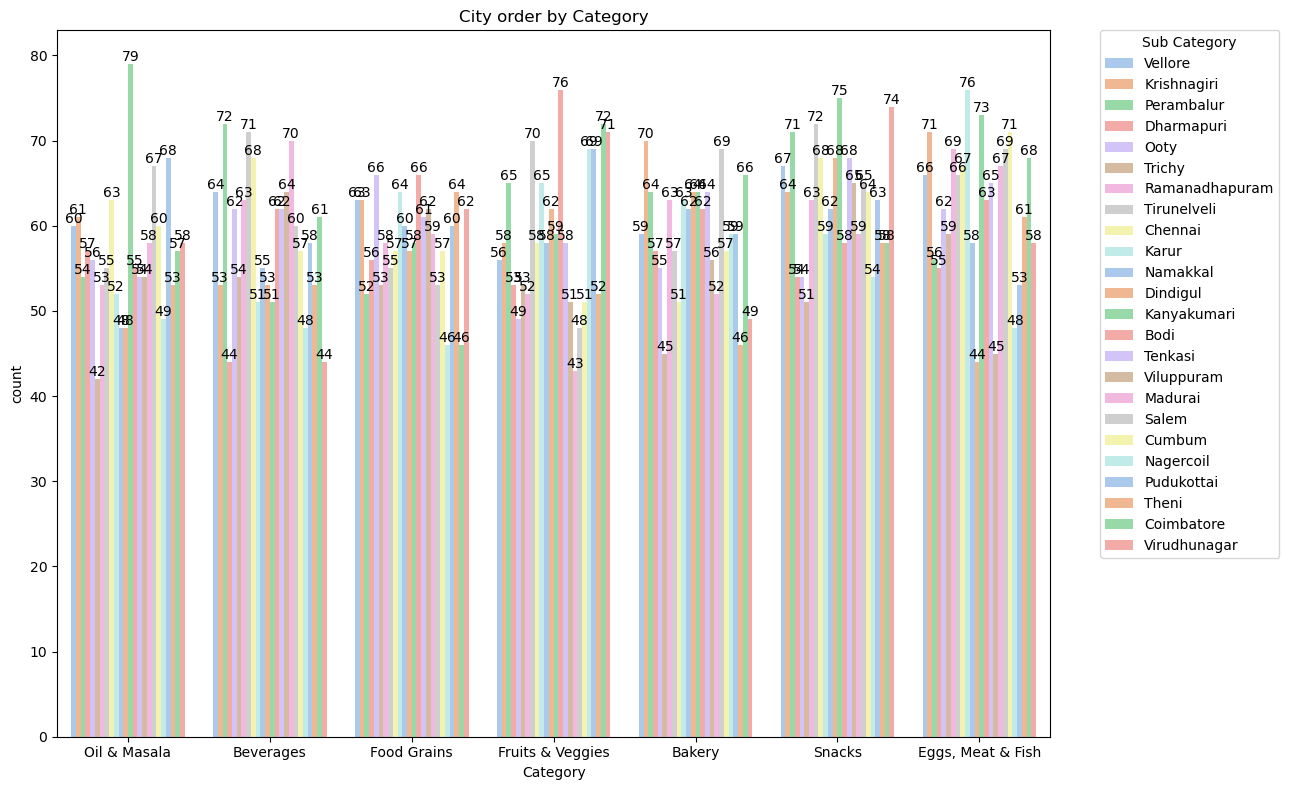

In [54]:
plt.figure(figsize=(13,8))
ax =sbn.countplot(x="Category" , hue="City" , data=df ,palette="pastel" )
plt.title("City order by Category")
for container in ax.containers:
    ax.bar_label(container)
ax.legend(title="Sub Category", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [27]:
df["State"].unique()

array(['Tamil Nadu'], dtype=object)

In [28]:
df.drop("State",axis=1,inplace=True)
df.sample()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
1518,OD1519,Alan,Fruits & Veggies,Fresh Vegetables,Viluppuram,09-08-2017,Central,1709,0.32,170.9


In [29]:
category_profits=df.groupby("Category")["Profit"].sum()

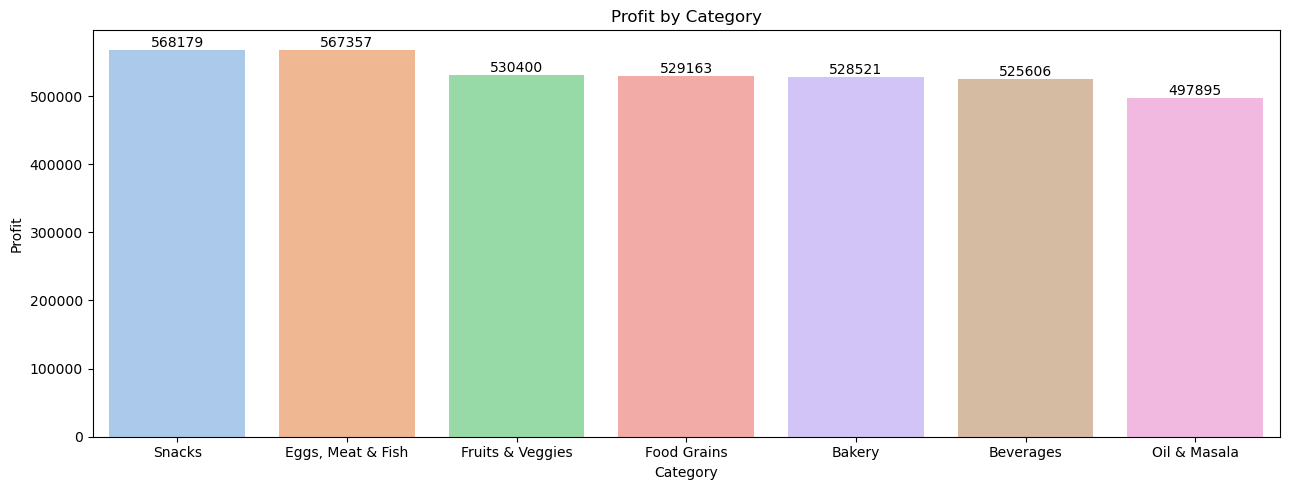

In [30]:
category_profits=df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
plt.figure(figsize=(13,5))
ax =sbn.barplot(y=category_profits.values , x=category_profits.index , data=df ,palette="pastel" )
plt.title("Profit by Category")
plt.ylabel("Profit")
plt.xlabel("Category")
for container in ax.containers:
    ax.bar_label(container)
    
plt.tight_layout()
plt.show()

In [32]:
category_Discount=df.groupby("Category")["Discount"].sum().reset_index()
category_Discount

,Category,Discount
0,Bakery,318.53
1,Beverages,322.46
2,"Eggs, Meat & Fish",339.41
3,Food Grains,319.51
4,Fruits & Veggies,325.14
5,Oil & Masala,305.58
6,Snacks,336.18


In [33]:
df.sample()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
1707,OD1708,Shah,Snacks,Cookies,Pudukottai,9/18/2017,South,2207,0.23,132.42


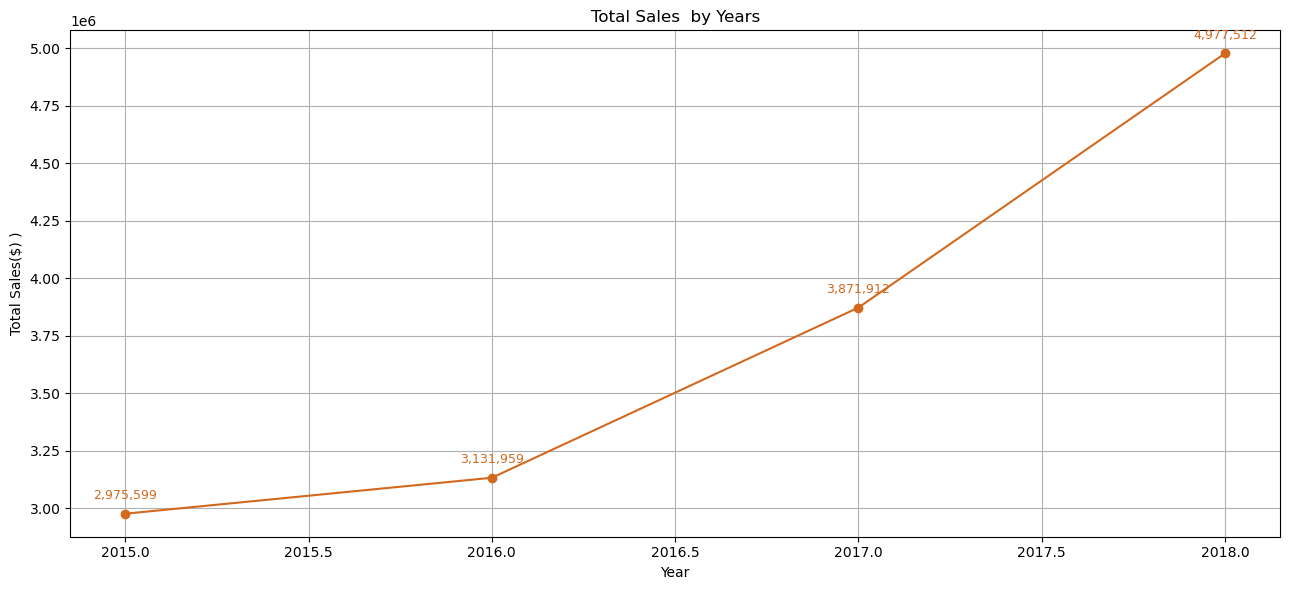

In [64]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["year"]=df["Order Date"].dt.year
category_yearly=df.groupby("year")["Sales"].sum()
ax = category_yearly.plot(kind='line', marker='o', color='#D2691E' , figsize=(13,6))
ax.set_title("Total Sales  by Years")
ax.set_xlabel("Year")
ax.set_ylabel("Total Sales($) )")

plt.grid(True)
plt.tight_layout()
for x, y in zip(category_yearly.index, category_yearly.values):
    ax.text(x, y + max(category_yearly.values)*0.01, f"{y:,.0f}", ha='center', va='bottom', fontsize=9, color='#D2691E')

plt.show()

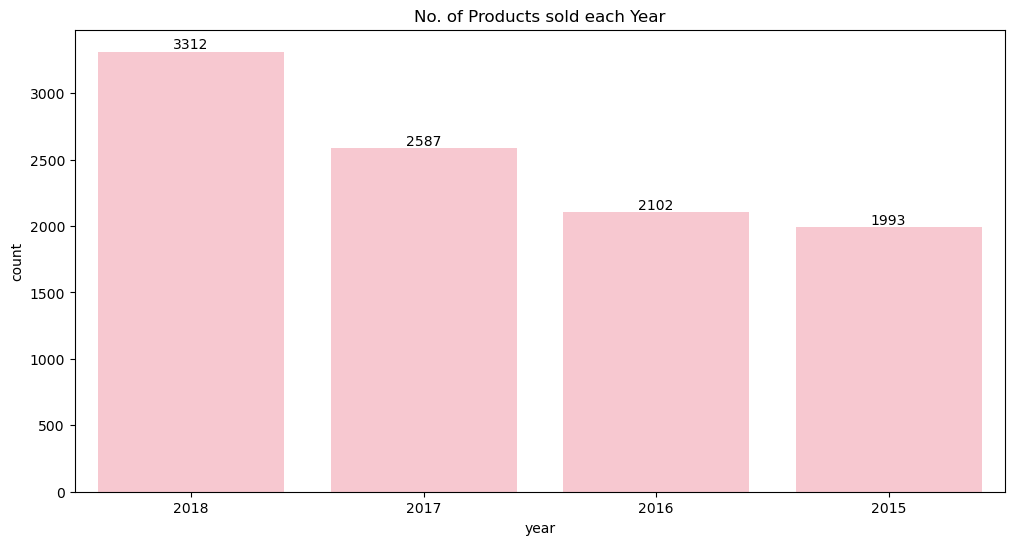

In [104]:
fig, ax = plt.subplots(figsize=(12, 6))
sbn.countplot(data=df, x="year", color="pink", order=df["year"].value_counts().index)
ax.set_title("No. of Products sold each Year")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [110]:
profit_by_year = df.groupby(["year"])["Profit"].sum().sort_values(ascending=False).reset_index()

In [96]:
df.pivot_table(index="year", columns="Category", values="Profit", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
year,,,,,,,
2015,107567.44,104834.61,126057.88,90837.84,100586.06,105637.64,117007.64
2016,124536.04,110201.14,114208.28,113643.27,118900.21,102656.22,113047.83
2017,122078.77,135179.89,135896.22,149775.58,130630.77,137558.11,142096.88
2018,174338.81,175390.12,191194.84,174905.95,180283.34,152043.32,196026.50


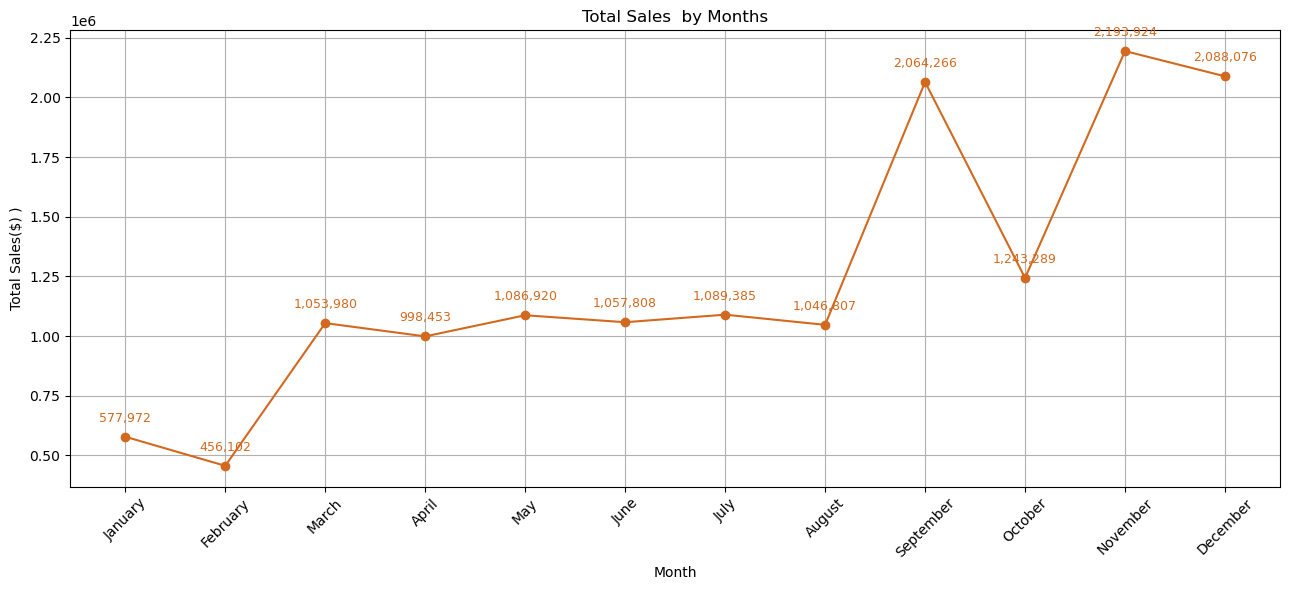

In [48]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["month"]=df["Order Date"].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
category_monthly=df.groupby("month")["Sales"].sum().reindex(month_order,fill_value=0)
ax = category_monthly.plot(kind='line', marker='o', color='#D2691E' , figsize=(13,6))
ax.set_title("Total Sales  by Months")
ax.set_xlabel("Month")
ax.set_ylabel("Total Sales($) )")
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)
plt.grid(True)
plt.tight_layout()
for i, month in enumerate(month_order):
    value = category_monthly[month]
    ax.text(i, value + 50000, f"{value:,.0f}", color='#D2691E',
            ha='center', va='bottom', fontsize=9)
plt.show()

In [42]:
category_monthly

month
January       577972
February      456102
March        1053980
April         998453
May          1086920
June         1057808
July         1089385
August       1046807
September    2064266
October      1243289
November     2193924
December     2088076
Name: Sales, dtype: int64

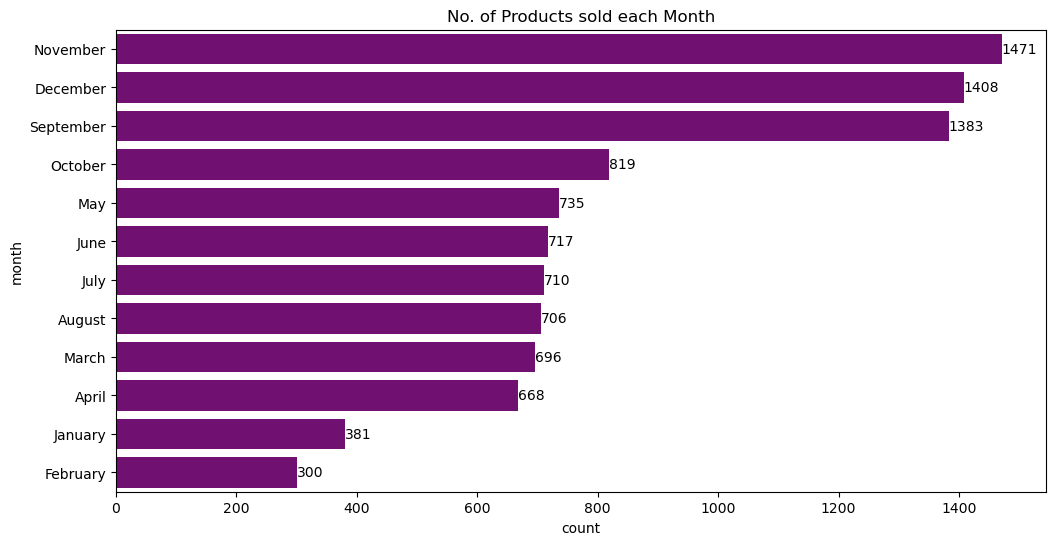

In [105]:
fig, ax = plt.subplots(figsize=(12, 6))
sbn.countplot(data=df, y="month", color="purple", order=df["month"].value_counts().index)
ax.set_title("No. of Products sold each Month")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()



In [97]:
df.pivot_table(index="month", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
month,,,,,,,
April,123181,151748,143530,128790,138084,157369,155751
August,162277,152976,149694,182850,140885,124935,133190
December,298939,265806,344238,291656,311754,270309,305374
February,54701,60188,58331,62983,74313,62044,83542
January,69139,91775,74158,79531,80753,95324,87292
July,168795,137856,151179,166926,162689,149179,152761
June,154397,140633,181754,128165,153431,129080,170348
March,154253,143575,165977,140169,126704,142637,180665
May,135113,163490,173024,143356,152491,182725,136721


In [98]:
df.pivot_table(index="month", columns="Category", values="Profit", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
month,,,,,,,
April,28491.68,38426.16,37453.93,31279.89,37907.45,36273.10,37644.76
August,40395.81,40139.14,38057.70,42734.55,34780.18,30230.38,32574.33
December,74036.37,67086.34,86623.79,75671.33,76006.63,71378.32,79233.66
February,12636.04,15080.17,15089.23,14680.57,19410.95,17374.45,21810.80
January,18555.36,23958.38,17714.58,18795.67,21362.53,22117.10,20014.90
July,39733.87,35285.65,40908.34,42397.92,40517.79,37037.06,38713.94
June,38539.89,36220.45,44216.92,31192.94,39272.91,31764.42,42088.63
March,42785.93,38049.03,43155.74,32659.45,30729.94,36544.52,43422.72
May,31426.63,38256.46,44998.40,35674.88,38603.40,41634.13,33049.50


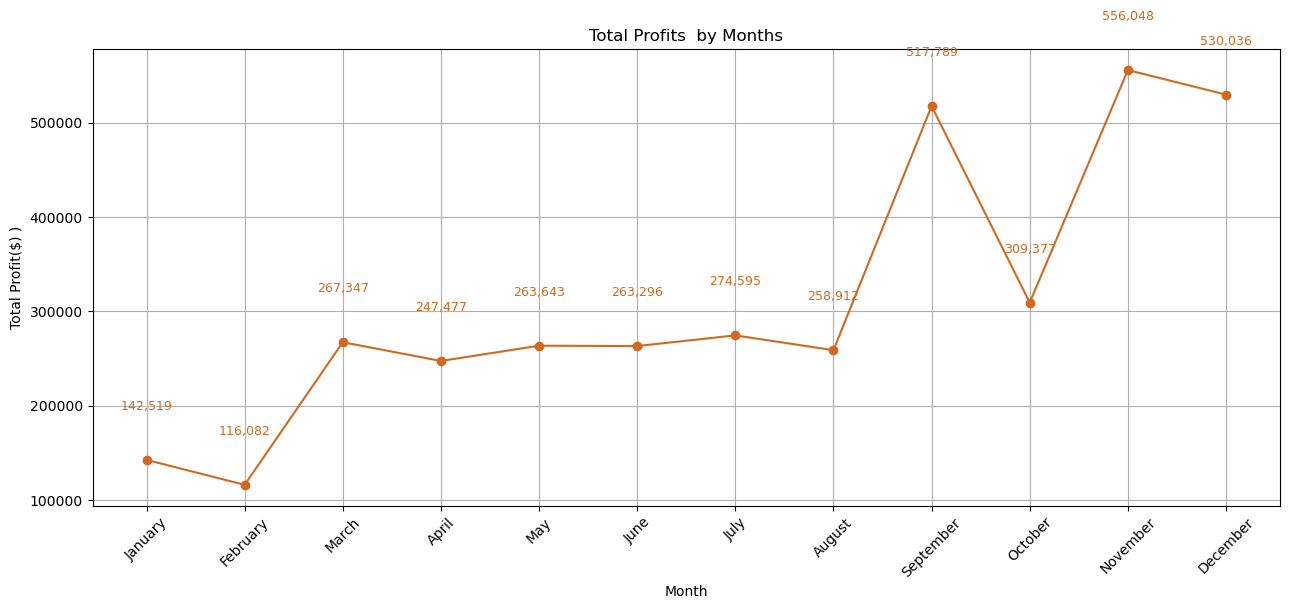

In [49]:
profit_monthly=df.groupby("month")["Profit"].sum().reindex(month_order,fill_value=0)
ax = profit_monthly.plot(kind='line', marker='o', color='#D2691E' , figsize=(13,6))
ax.set_title("Total Profits  by Months")
ax.set_xlabel("Month")
ax.set_ylabel("Total Profit($) )")
ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)
plt.grid(True)
plt.tight_layout()
for i, month in enumerate(month_order):
    value = profit_monthly[month]
    ax.text(i, value + 50000, f"{value:,.0f}", color='#D2691E',
            ha='center', va='bottom', fontsize=9)
plt.show()

In [51]:
df.sample()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,month
3599,OD3600,Adavan,Bakery,Biscuits,Salem,2018-08-07,East,774,0.31,92.88,August


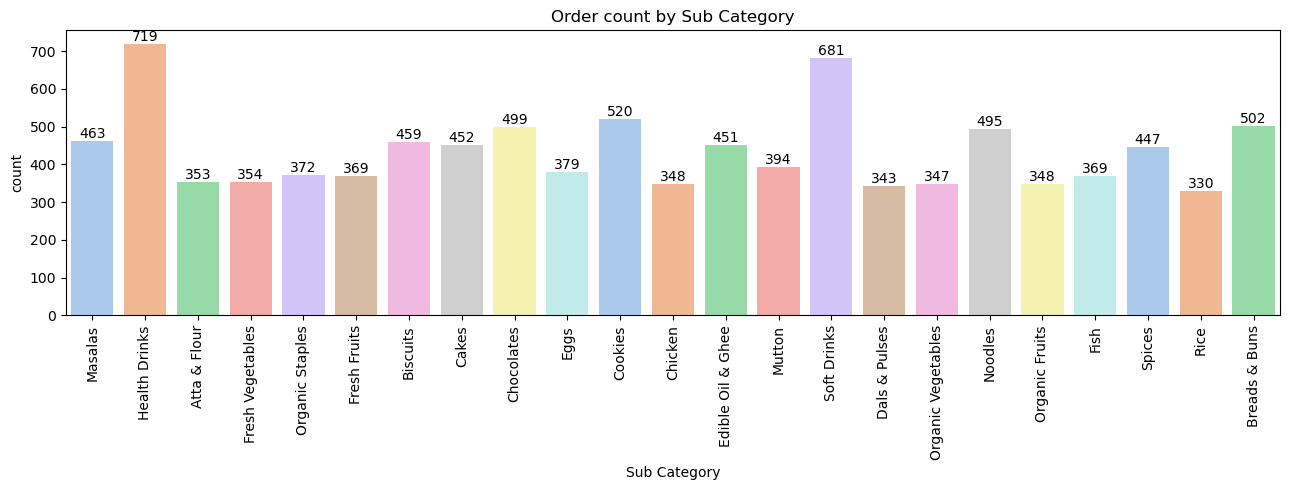

In [56]:
plt.figure(figsize=(13,5))
ax =sbn.countplot(x="Sub Category" , data =df ,palette="pastel" )
plt.title("Order count by Sub Category")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

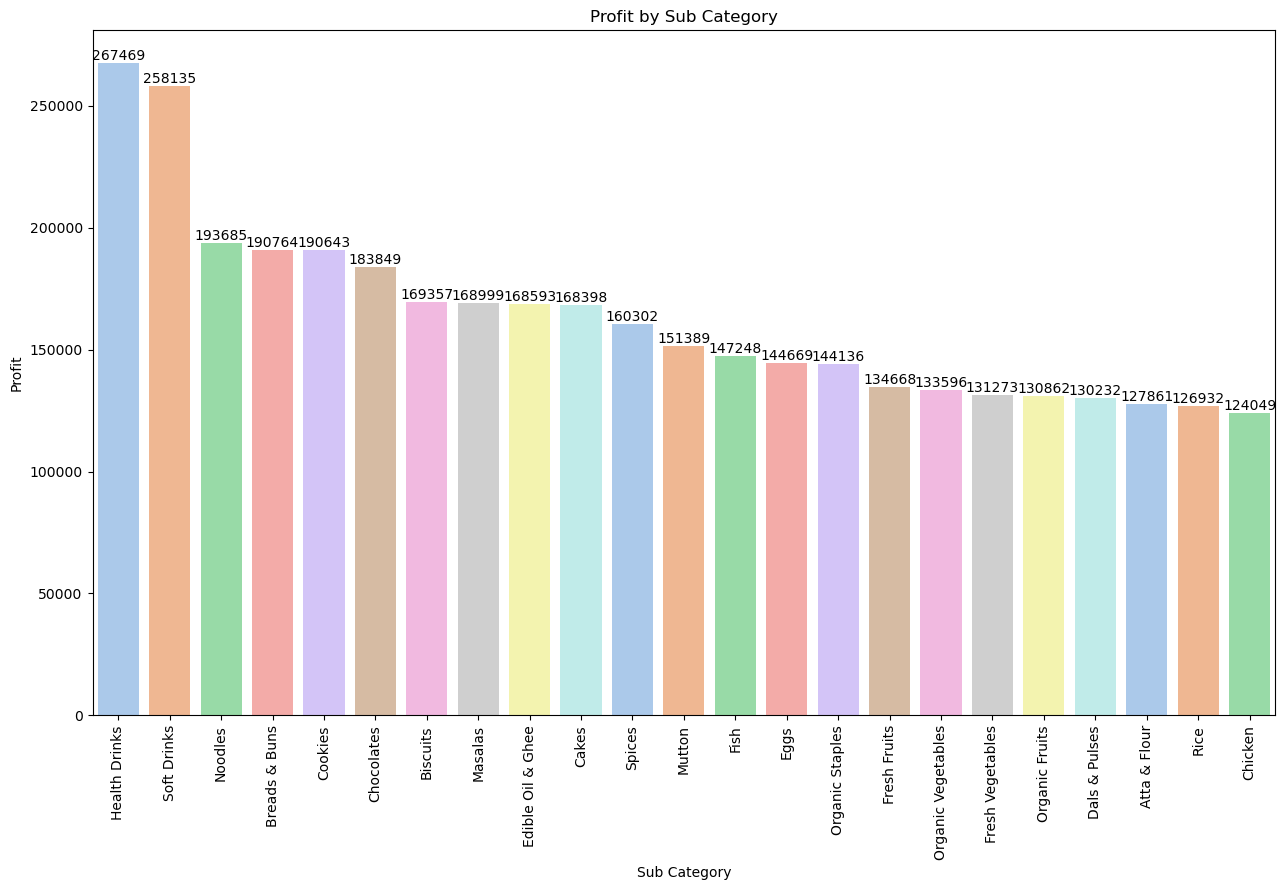

In [108]:
profit_by_sub_category = df.groupby(["Sub Category"])["Profit"].sum().sort_values(ascending=False)
plt.figure(figsize=(13,9))
ax =sbn.barplot(y=profit_by_sub_category.values , x=profit_by_sub_category.index , data=df ,palette="pastel" )
plt.title("Profit by Sub Category")
plt.ylabel("Profit")
plt.xlabel("Sub Category")
ax.bar_label(ax.containers[0], fmt='%d')
plt.xticks(rotation=90)    
plt.tight_layout()
plt.show()

In [57]:
df["Sub Category"].value_counts().head(2)

Health Drinks    719
Soft Drinks      681
Name: Sub Category, dtype: int64

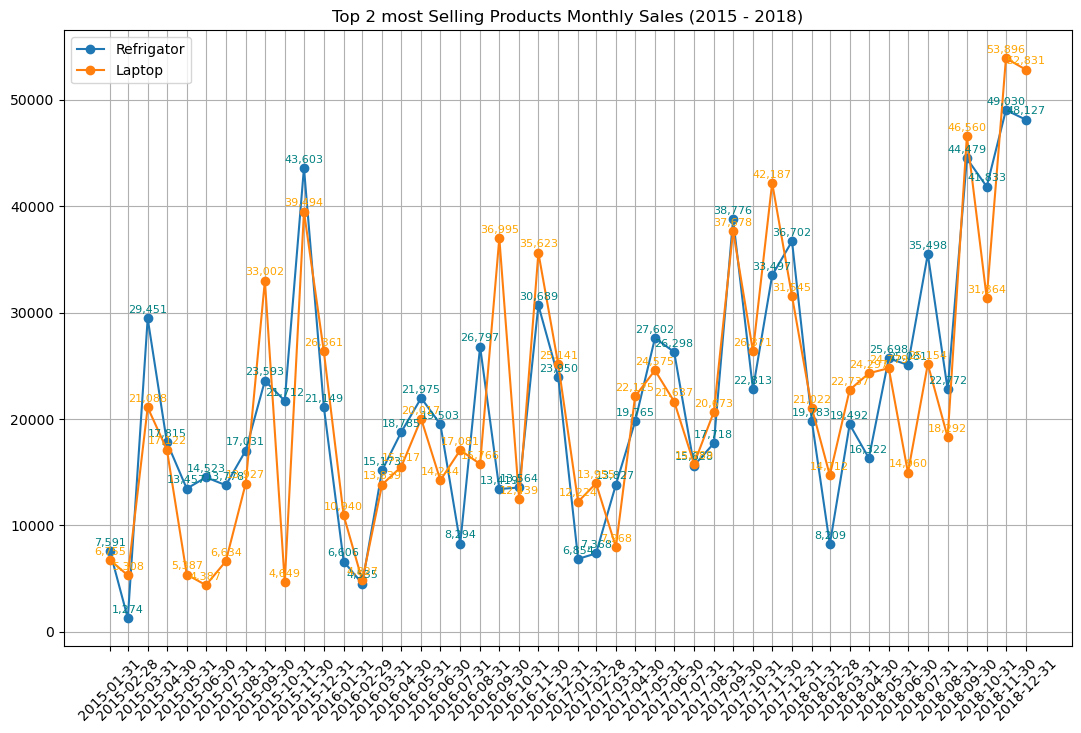

In [68]:
HealthDrinks = df[df['Sub Category'] == 'Health Drinks']
HealthDrinks = HealthDrinks.set_index('Order Date')  
HealthDrinks = HealthDrinks['Sales'].resample('M').sum()
HealthDrinks = HealthDrinks.reset_index()

SoftDrinks = df[df['Sub Category'] == 'Soft Drinks']
SoftDrinks = SoftDrinks.set_index('Order Date')  
SoftDrinks = SoftDrinks['Sales'].resample('M').sum()
SoftDrinks = SoftDrinks.reset_index()

plt.figure(figsize=(13,8))
plt.plot(HealthDrinks["Order Date"], HealthDrinks["Sales"], marker ="o" , label="Refrigator")
plt.plot(SoftDrinks["Order Date"], SoftDrinks["Sales"], marker ="o" , label="Laptop")

for i in range(len(HealthDrinks)):
    plt.text(HealthDrinks["Order Date"][i], HealthDrinks["Sales"][i] + 500, 
             f"{HealthDrinks['Sales'][i]:,.0f}", fontsize=8, color='teal', ha='center')

for i in range(len(SoftDrinks)):
    plt.text(SoftDrinks["Order Date"][i], SoftDrinks["Sales"][i] + 500, 
             f"{SoftDrinks['Sales'][i]:,.0f}", fontsize=8, color='orange', ha='center')

plt.title('Top 2 most Selling Products Monthly Sales (2015 - 2018)')
plt.xticks(HealthDrinks['Order Date'], rotation=45)
plt.grid(True)
plt.legend()
plt.show()

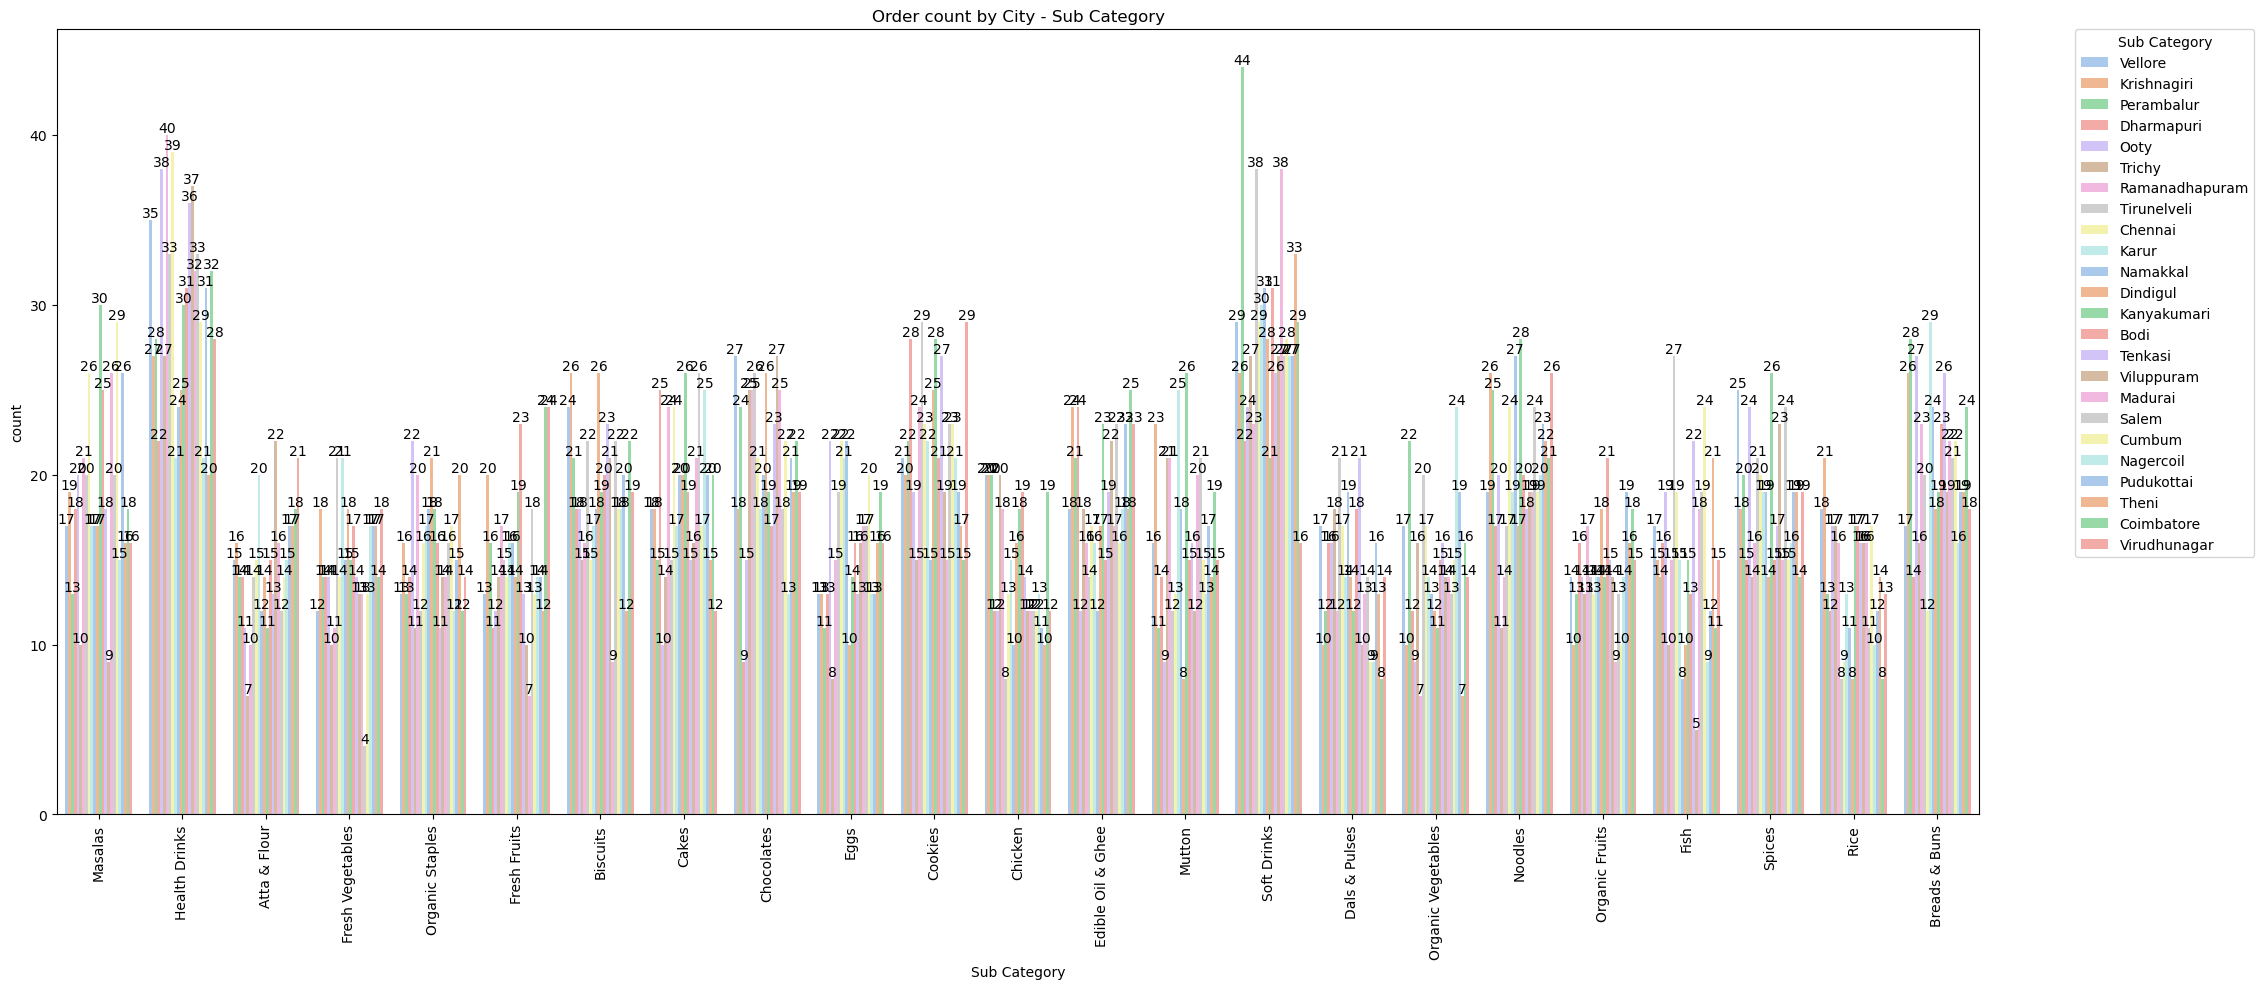

In [69]:
plt.figure(figsize=(20,10))
ax =sbn.countplot(x="Sub Category" , hue="City" ,data =df ,palette="pastel" )
plt.title("Order count by City - Sub Category")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.tight_layout()
ax.legend(title="Sub Category", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [92]:
df.pivot_table(index="year", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
year,,,,,,,
2015,433979,409091,482982,356704,409212,423918,459713
2016,487965,425719,462055,438736,468441,412725,436318
2017,504263,543575,565101,609338,516400,564196,569039
2018,686074,706928,757263,710494,706674,637603,772476


In [93]:
df.pivot_table(index="month", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
month,,,,,,,
April,123181,151748,143530,128790,138084,157369,155751
August,162277,152976,149694,182850,140885,124935,133190
December,298939,265806,344238,291656,311754,270309,305374
February,54701,60188,58331,62983,74313,62044,83542
January,69139,91775,74158,79531,80753,95324,87292
July,168795,137856,151179,166926,162689,149179,152761
June,154397,140633,181754,128165,153431,129080,170348
March,154253,143575,165977,140169,126704,142637,180665
May,135113,163490,173024,143356,152491,182725,136721


In [89]:
df.groupby(["Customer Name","City"])["City"].count().sort_values(ascending=False).head(10)

Customer Name  City          
Sharon         Ooty              20
James          Ramanadhapuram    18
Sudeep         Madurai           18
Amrish         Viluppuram        18
Esther         Virudhunagar      17
Veronica       Tenkasi           16
Verma          Cumbum            16
Surya          Cumbum            16
Yadav          Perambalur        16
Jonas          Cumbum            16
Name: City, dtype: int64

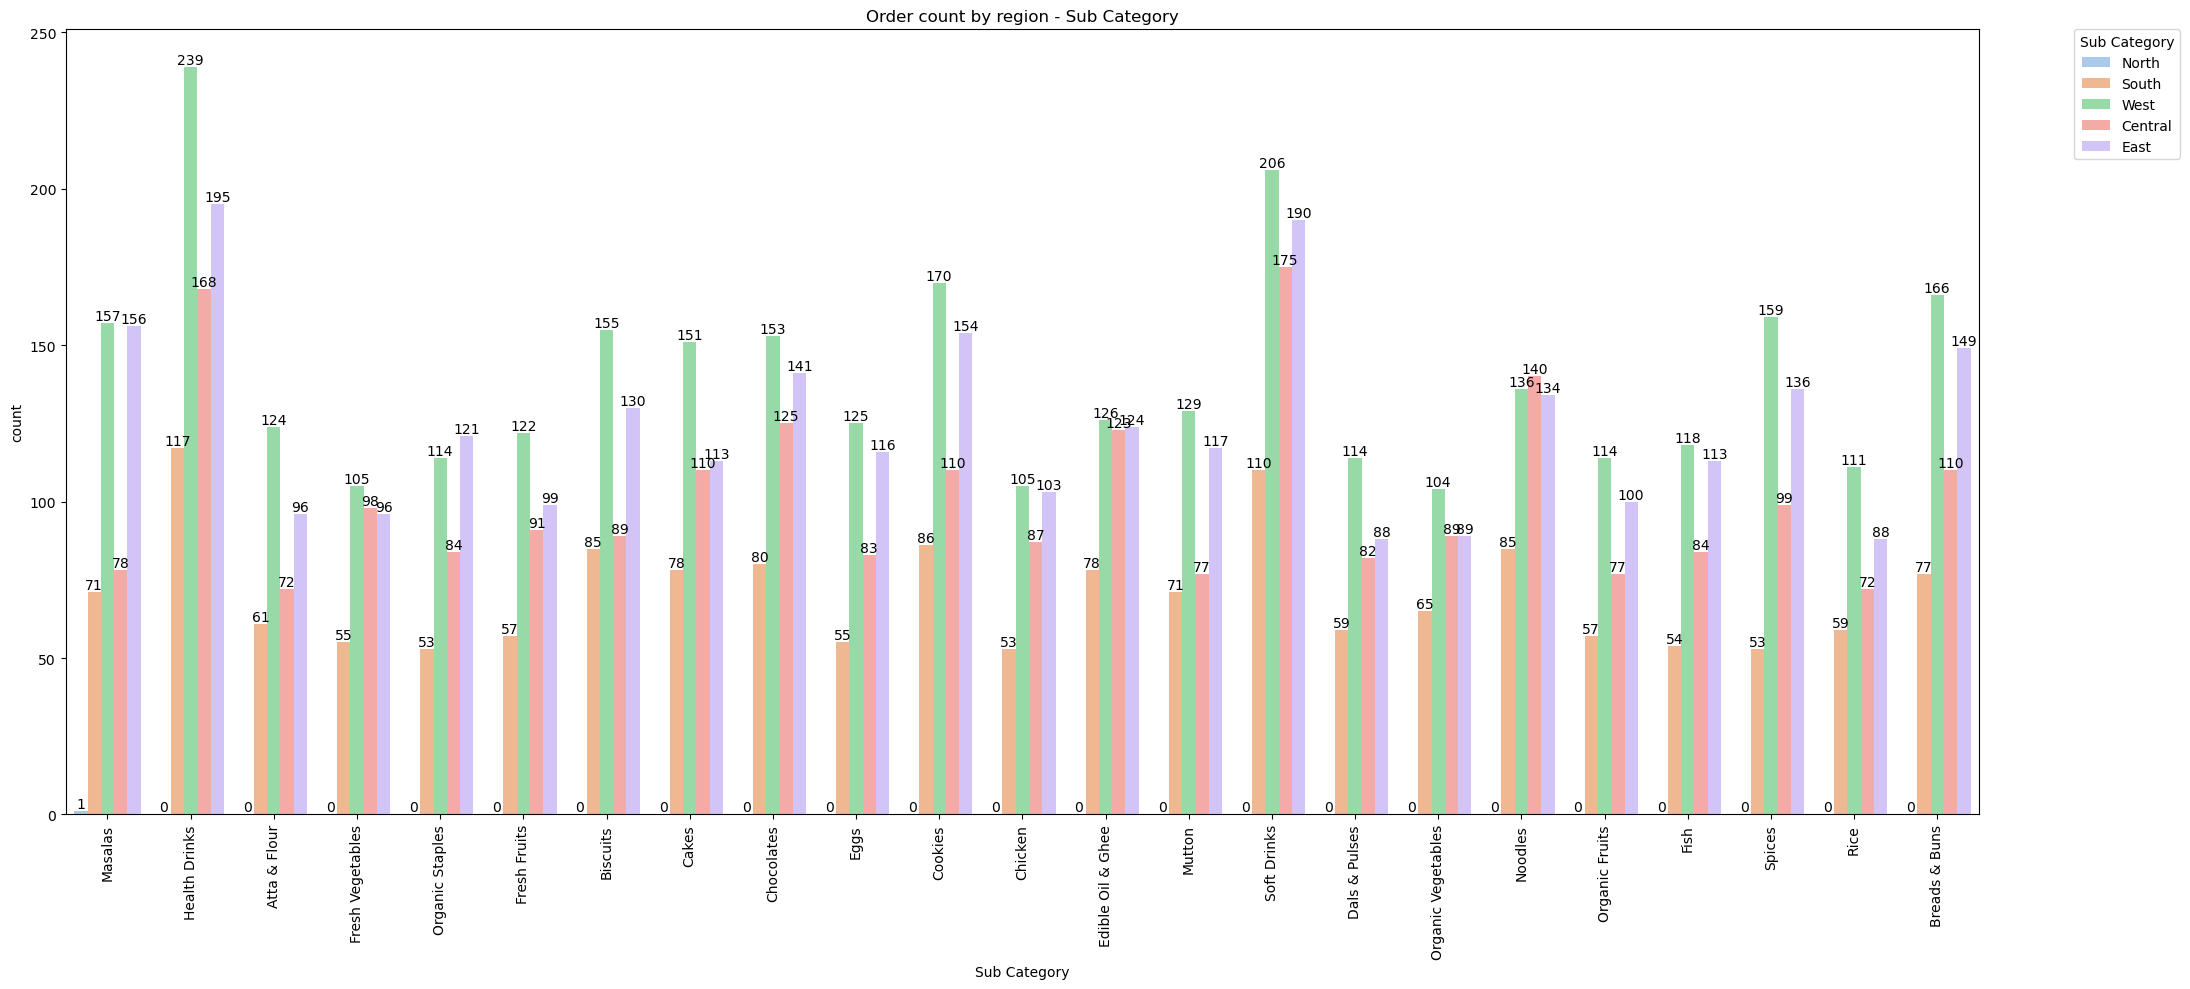

In [70]:
plt.figure(figsize=(20,10))
ax =sbn.countplot(x="Sub Category" , hue="Region" ,data =df ,palette="pastel" )
plt.title("Order count by region - Sub Category")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.tight_layout()
ax.legend(title="Sub Category", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [94]:
df.pivot_table(index="Region", columns="Category", values="Sales", aggfunc="sum")

Category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
Region,,,,,,,
Central,448343.0,501194.0,516642.0,463683.0,526507.0,453293.0,558494.0
East,588241.0,577206.0,677830.0,598868.0,564237.0,622071.0,619915.0
North,NaN,NaN,NaN,NaN,NaN,1254.0,NaN
South,361385.0,344666.0,360963.0,353069.0,352162.0,298859.0,369357.0
West,714312.0,662247.0,711966.0,699652.0,657821.0,662965.0,689780.0


In [90]:
df.groupby(["Customer Name","Region"])["Region"].count().sort_values(ascending=False).head(10)

Customer Name  Region
Krithika       West      90
Malik          West      77
Veena          West      76
Veronica       West      75
Mathew         West      75
Arutra         West      74
Peer           West      73
Muneer         West      73
Krithika       East      73
Amrish         West      73
Name: Region, dtype: int64

In [71]:
df.sample()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,month,year
4587,OD4588,Jackson,Bakery,Breads & Buns,Vellore,2015-11-10,West,653,0.12,267.73,November,2015


In [73]:
df["Customer Name"].value_counts().reset_index().head(10)

,index,Customer Name
0,Amrish,227
1,Krithika,224
2,Verma,218
3,Arutra,218
4,Vidya,215
5,Shah,215
6,Suresh,212
7,Surya,209
8,Harish,208
9,Hussain,208


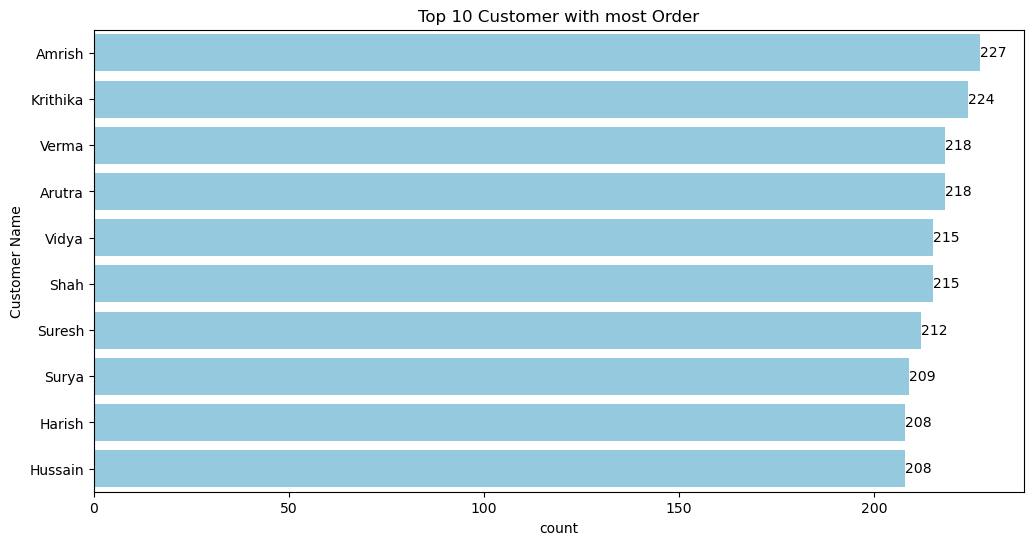

In [113]:
fig, ax = plt.subplots(figsize=(12, 6))
sbn.countplot(data=df, y="Customer Name", color="skyblue", order=df["Customer Name"].value_counts().head(10).index)
ax.set_title("Top 10 Customer with most Order")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [116]:
customer_sale=df.groupby(["Customer Name"])["Sales"].sum().sort_values(ascending=False).head(10)

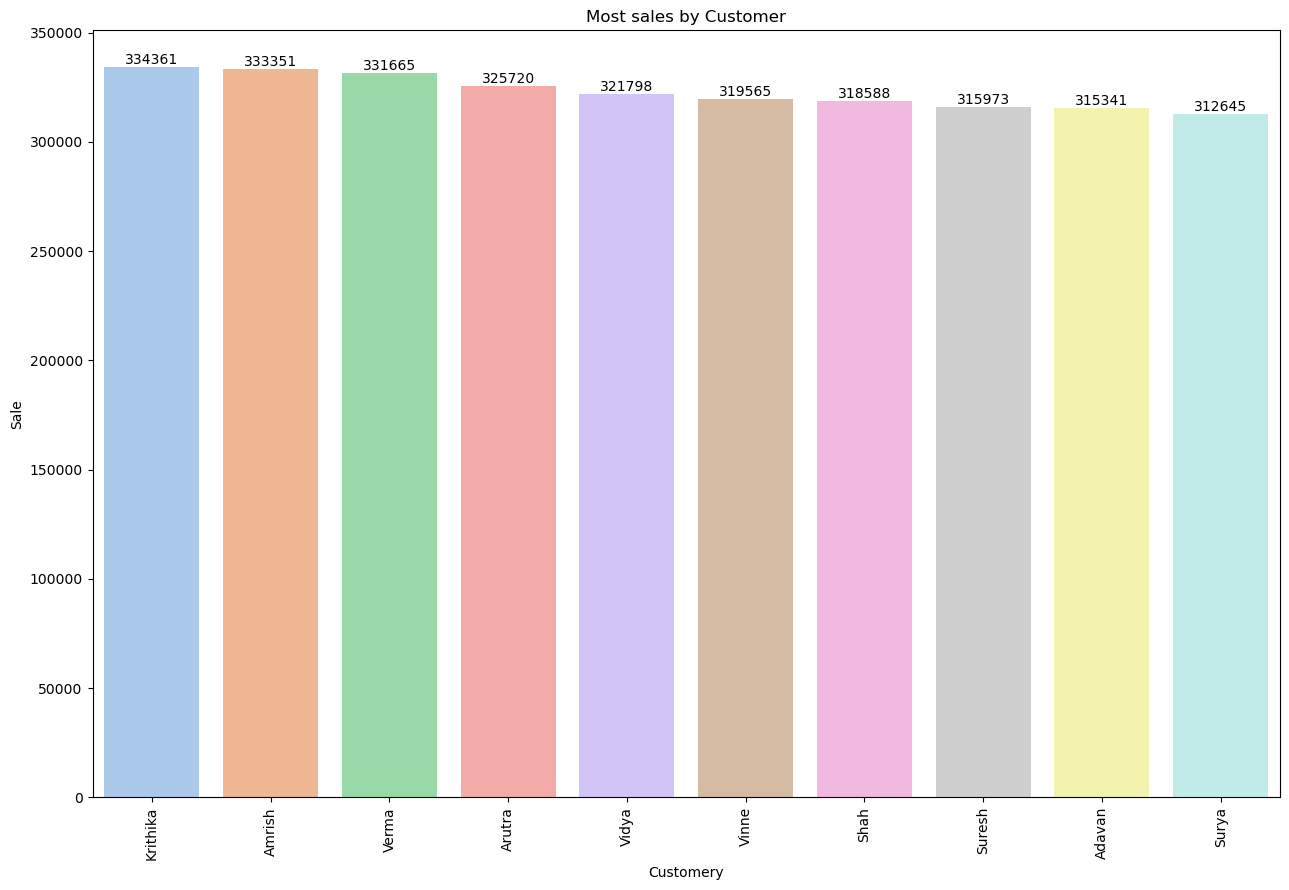

In [117]:
plt.figure(figsize=(13,9))
ax =sbn.barplot(y=customer_sale.values , x=customer_sale.index , data=df ,palette="pastel" )
plt.title("Most sales by Customer")
plt.ylabel("Sale")
plt.xlabel("Customery")
ax.bar_label(ax.containers[0], fmt='%d')
plt.xticks(rotation=90)    
plt.tight_layout()
plt.show()

In [86]:
df.groupby(["Customer Name","Category"])["Category"].count().sort_values(ascending=False).head(10)

Customer Name  Category         
Veronica       Fruits & Veggies     43
Ganesh         Snacks               42
Yusuf          Oil & Masala         42
Amrish         Bakery               42
Vidya          Eggs, Meat & Fish    41
Verma          Eggs, Meat & Fish    41
Vinne          Snacks               40
Amrish         Food Grains          40
Shah           Bakery               40
Ram            Beverages            40
Name: Category, dtype: int64

In [87]:
df.groupby(["Customer Name","Sub Category"])["Sub Category"].count().sort_values(ascending=False).head(10)

Customer Name  Sub Category 
Yadav          Soft Drinks      23
Amy            Health Drinks    22
Ram            Health Drinks    22
Veena          Soft Drinks      21
Ridhesh        Soft Drinks      20
Krithika       Cakes            20
James          Health Drinks    20
Rumaiza        Soft Drinks      20
Shah           Health Drinks    19
Amrish         Health Drinks    19
Name: Sub Category, dtype: int64

In [88]:
df.groupby(["Customer Name","Sub Category"])["Sales"].sum().sort_values(ascending=False).head(10)

Customer Name  Sub Category 
Veena          Soft Drinks      37269
Amy            Health Drinks    34375
James          Health Drinks    32393
Willams        Soft Drinks      31916
Yadav          Soft Drinks      30531
James          Soft Drinks      29873
Krithika       Cakes            29627
Mathew         Health Drinks    29304
Ram            Soft Drinks      29186
Rumaiza        Soft Drinks      28736
Name: Sales, dtype: int64

<AxesSubplot:xlabel='Sales', ylabel='Count'>

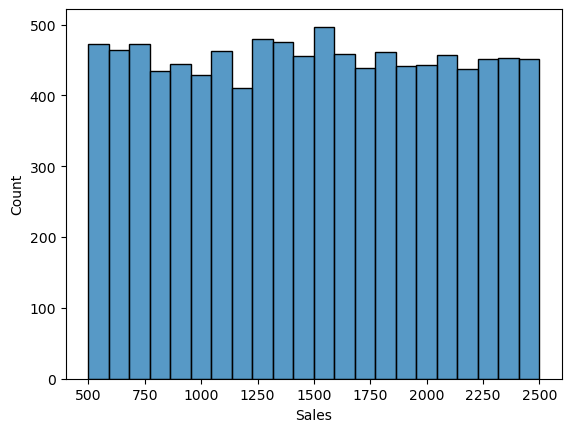

In [76]:
sbn.histplot(df["Sales"])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

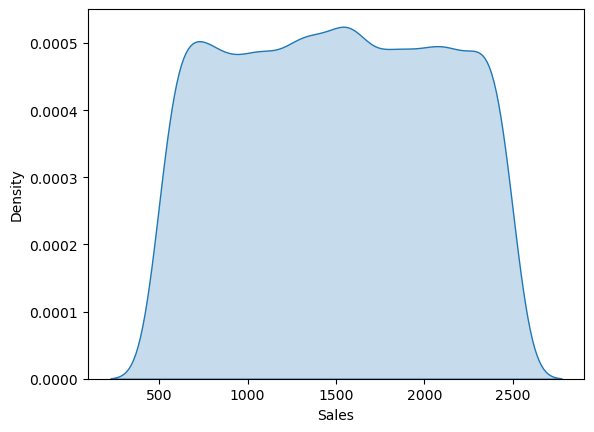

In [78]:
sbn.kdeplot(df["Sales"], shade = True)